<a href="https://colab.research.google.com/github/aadi-kanwar/Neural-Network-Deep-Learning/blob/main/Exp_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Simulate the dataset

In [5]:
import numpy as np
import cv2
import random
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [6]:
# Generate a synthetic image dataset with bounding boxes
def generate_image(shape, img_size = 64):
    img = np.ones((img_size, img_size, 3)) * 255
    if shape == 'square':
        size = random.randint(10, 30)
        x1, y1 = random.randint(0, img_size - size), random.randint(0, img_size - size)
        x2, y2 = x1 + size, y1 + size
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 0), -1)
        label = [0,1]   # Square Class
    elif shape == 'circle':
        radius = random.randint(10, 30)
        x, y = random.randint(radius, img_size - radius), random.randint(radius, img_size - radius)
        cv2.circle(img, (x, y), radius, (0, 0, 0), -1)
        x1, y1, x2, y2 = x - radius, y - radius, x + radius, y + radius
        label = [0,1]   # Circle Class
    return img/255.0, label, [x1/img_size, y1/img_size, x2/img_size, y2/img_size]   # Normalize bbox

In [7]:
# Generate Dataset
def generate_dataset(n_samples=1000, img_size = 64):
    images = []
    labels = []
    bboxes = []
    for _ in range(n_samples):
        shape = random.choice(['square', 'circle'])
        img, label, bbox = generate_image(shape, img_size)
        images.append(img)
        labels.append(label)
        bboxes.append(bbox)
    return np.array(images), np.array(labels), np.array(bboxes)

In [8]:
# Generate dataset with 1000 samples
X, y, bboxes = generate_dataset(n_samples=1000)
print("Dataset Shape:", X.shape, y.shape, bboxes.shape)

Dataset Shape: (1000, 64, 64, 3) (1000, 2) (1000, 4)


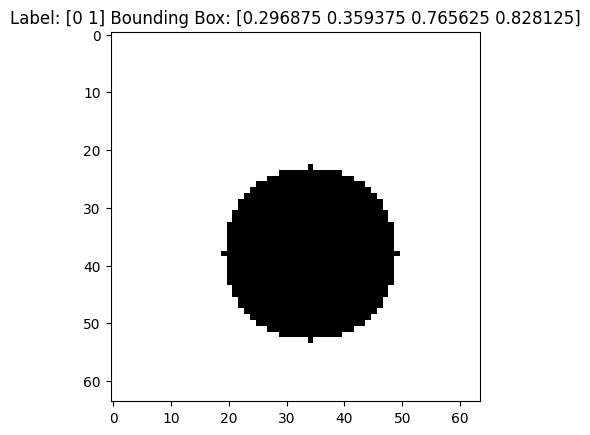

In [11]:
# Display sample image
plt.imshow(X[0])
plt.title(f'Label: {y[0]} Bounding Box: {bboxes[0]}')
plt.show()